# Tool to extract usefull information from mlperf trace

In [157]:
%matplotlib inline
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import json
import os
import seaborn as sns
from operator import itemgetter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

figsize=(10, 5)
font=10

plt.figure(dpi=600)
plt.rc('xtick', labelsize=font) 
plt.rc('font', size=font)
sns.set(font_scale=1.4, style="whitegrid");

<Figure size 3600x2400 with 0 Axes>

In [158]:
def trace_to_df(fname):
    with open(fname, "r") as f:
        print(f)
        j = json.load(f)
    if type(j) == dict:
        j = j['traceEvents']
        
    result = []
    for item in j:
        name = item['name']
        if name not in ["Latency", "Sample", "QuerySamplesComplete", "IssueQuery"]:
            continue

        args = item.get('args')
        d = {"ts": item['ts'], "name": name, "dur": item.get("dur")}

        if name == "Latency":
            d["issue_delay"] = args["issue_delay"]
            d["issue_to_done"] = args["issue_to_done"] / 1e3
            result.append(d)
        elif name == "Sample":
            if args:
                d["issue_start_ns"] = args["issue_start_ns"]
                d["complete_ns"] = args["complete_ns"]
                d["issue_to_done"] = (args["complete_ns"] - args["issue_start_ns"]) / 1e3
                result.append(d)
        elif name == "QuerySamplesComplete":
            result.append(d)
        elif name == "IssueQuery":
            result.append(d)

    df = pd.DataFrame(result)
    df = df.sort_values(by=["ts"])
    return df

BINS = 10

In [206]:
# Fixing bin edges
HIST_BINS = np.linspace(0, 1000000, 100)

In [160]:
df = trace_to_df('/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-S-1-10/mlperf_log_trace.json')
df.describe()

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>


,ts,dur,issue_delay,issue_to_done,issue_start_ns,complete_ns
count,1.081344e+06,5.406720e+05,2.703360e+05,5.406720e+05,2.703360e+05,2.703360e+05
mean,1.486394e+09,5.829168e+03,2.672029e+11,2.114504e+06,2.672029e+11,2.693174e+11
std,8.765287e+08,1.987282e+04,1.613688e+11,7.991747e+05,1.613688e+11,1.614863e+11
min,3.867675e+05,2.858000e+00,8.950000e+02,4.747829e+04,8.950000e+02,4.759011e+07
25%,7.287934e+08,5.998000e+00,1.261434e+11,1.682573e+06,1.261434e+11,1.279457e+11
50%,1.479003e+09,4.267900e+01,2.755900e+11,1.793367e+06,2.755900e+11,2.773292e+11
75%,2.215433e+09,6.178238e+03,3.996473e+11,2.566940e+06,3.996473e+11,4.025392e+11
max,3.254750e+09,2.348737e+06,5.463544e+11,5.734636e+06,5.463544e+11,5.494223e+11


In [161]:
df["name"].unique()

array(['Latency', 'Sample', 'IssueQuery', 'QuerySamplesComplete'],
      dtype=object)

In [176]:
df

,ts,name,dur,issue_delay,issue_to_done,issue_start_ns,complete_ns
4,3.867675e+05,Latency,NaN,3079.0,71595.096,NaN,NaN
5,3.867675e+05,Sample,NaN,NaN,71595.096,3079.0,71598175.0
0,3.867714e+05,IssueQuery,140.561,NaN,NaN,NaN,NaN
15,4.212784e+05,Sample,NaN,NaN,74877.032,91319.0,74968351.0
14,4.212784e+05,Latency,NaN,91319.0,74877.032,NaN,NaN
...,...,...,...,...,...,...,...
1081331,3.254733e+09,QuerySamplesComplete,5.698,NaN,NaN,NaN,NaN
1081334,3.254733e+09,QuerySamplesComplete,6.212,NaN,NaN,NaN,NaN
1081337,3.254749e+09,QuerySamplesComplete,5.508,NaN,NaN,NaN,NaN
1081340,3.254750e+09,QuerySamplesComplete,5.783,NaN,NaN,NaN,NaN


In [163]:
df1 = df[df["name"].isin(["Sample"])]
df1

,ts,name,dur,issue_delay,issue_to_done,issue_start_ns,complete_ns
5,3.867675e+05,Sample,NaN,NaN,71595.096,3.079000e+03,7.159818e+07
15,4.212784e+05,Sample,NaN,NaN,74877.032,9.131900e+04,7.496835e+07
12,4.250173e+05,Sample,NaN,NaN,67319.602,9.483600e+04,6.741444e+07
18,4.393082e+05,Sample,NaN,NaN,69998.250,1.046650e+05,7.010292e+07
23,4.682809e+05,Sample,NaN,NaN,74994.199,9.975500e+04,7.509395e+07
...,...,...,...,...,...,...,...
1081321,2.706135e+09,Sample,NaN,NaN,2343825.912,5.462380e+11,5.485819e+11
1081324,2.706156e+09,Sample,NaN,NaN,2329457.979,5.462328e+11,5.485623e+11
1081312,2.706162e+09,Sample,NaN,NaN,2310172.933,5.462325e+11,5.485427e+11
1081318,2.706163e+09,Sample,NaN,NaN,2292475.150,5.462579e+11,5.485504e+11


In [168]:
df1 = df[df["name"].isin(["IssueQuery"])]
df1

,ts,name,dur,issue_delay,issue_to_done,issue_start_ns,complete_ns
0,3.867714e+05,IssueQuery,140.561,NaN,NaN,NaN,NaN
1,4.213734e+05,IssueQuery,58.146,NaN,NaN,NaN,NaN
2,4.251146e+05,IssueQuery,55.825,NaN,NaN,NaN,NaN
3,4.394187e+05,IssueQuery,106.687,NaN,NaN,NaN,NaN
7,4.683866e+05,IssueQuery,109.146,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1080787,3.252373e+09,IssueQuery,15056.202,NaN,NaN,NaN,NaN
1080788,3.252388e+09,IssueQuery,6019.841,NaN,NaN,NaN,NaN
1080798,3.252394e+09,IssueQuery,26799.664,NaN,NaN,NaN,NaN
1080799,3.252421e+09,IssueQuery,524.900,NaN,NaN,NaN,NaN


In [215]:
df1 = df[df["name"].isin(["Latency"])]
df1

,ts,name,dur,issue_delay,issue_to_done,issue_start_ns,complete_ns
116,4.297476e+05,Latency,NaN,3.179000e+03,798453.203,NaN,NaN
162,4.642585e+05,Latency,NaN,1.066050e+05,856133.872,NaN,NaN
168,4.679974e+05,Latency,NaN,1.138070e+05,867964.779,NaN,NaN
159,4.822882e+05,Latency,NaN,8.561000e+04,837311.199,NaN,NaN
91,5.112610e+05,Latency,NaN,1.106140e+05,643398.139,NaN,NaN
...,...,...,...,...,...,...,...
1081308,2.706178e+09,Latency,NaN,5.484101e+11,1282202.883,NaN,NaN
1081311,2.706199e+09,Latency,NaN,5.484072e+11,1267150.236,NaN,NaN
1081320,2.706205e+09,Latency,NaN,5.484083e+11,1290003.774,NaN,NaN
1081314,2.706206e+09,Latency,NaN,5.484251e+11,1266326.130,NaN,NaN


In [173]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1

,ts,name,dur,issue_delay,issue_to_done,issue_start_ns,complete_ns
6,4.583667e+05,QuerySamplesComplete,28.180,NaN,NaN,NaN,NaN
13,4.924331e+05,QuerySamplesComplete,21.054,NaN,NaN,NaN,NaN
16,4.962479e+05,QuerySamplesComplete,19.283,NaN,NaN,NaN,NaN
19,5.094124e+05,QuerySamplesComplete,20.161,NaN,NaN,NaN,NaN
24,5.433758e+05,QuerySamplesComplete,21.974,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1081331,3.254733e+09,QuerySamplesComplete,5.698,NaN,NaN,NaN,NaN
1081334,3.254733e+09,QuerySamplesComplete,6.212,NaN,NaN,NaN,NaN
1081337,3.254749e+09,QuerySamplesComplete,5.508,NaN,NaN,NaN,NaN
1081340,3.254750e+09,QuerySamplesComplete,5.783,NaN,NaN,NaN,NaN


# server scenario

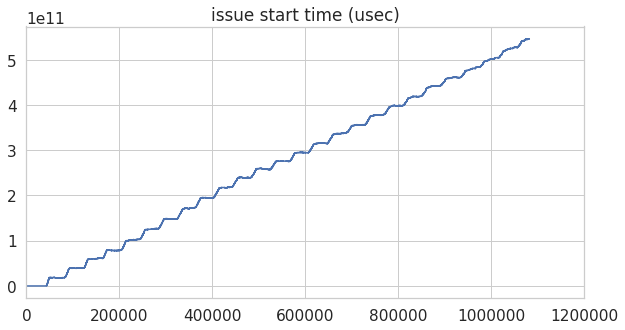

In [164]:
#y is the issue_start_ns
df1 = df[df["name"].isin(["Sample"])]
ax = df1['issue_start_ns'].plot(figsize=figsize)
ax.set(xlim=(0, 1200000))
ax.set_title('issue start time (usec)');

In [165]:
df_time=df1['issue_start_ns'].shift()
df_time

5                   NaN
15         3.079000e+03
12         9.131900e+04
18         9.483600e+04
23         1.046650e+05
               ...     
1081321    5.462349e+11
1081324    5.462380e+11
1081312    5.462328e+11
1081318    5.462325e+11
1081327    5.462579e+11
Name: issue_start_ns, Length: 270336, dtype: float64

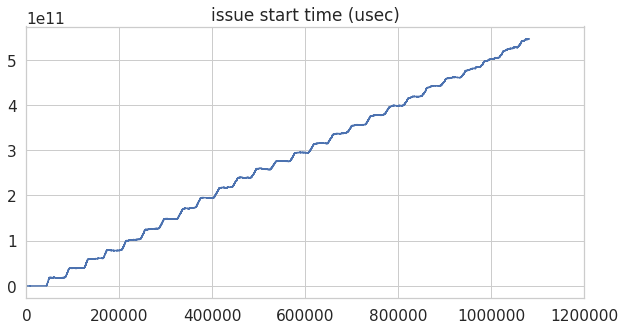

In [167]:
#time poisson
ax = df_time.plot(figsize=figsize)
ax.set(xlim=(0, 1200000))
ax.set_title('issue start time (usec)');

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
2348737.299


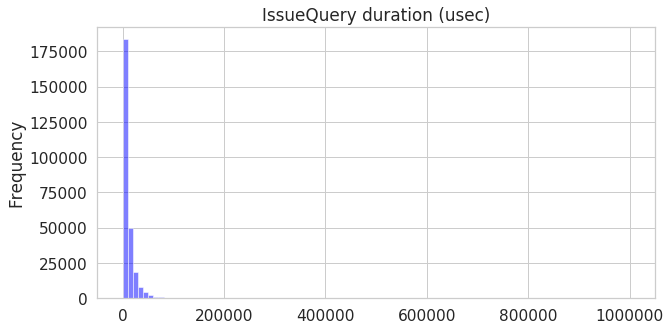

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
959715.029


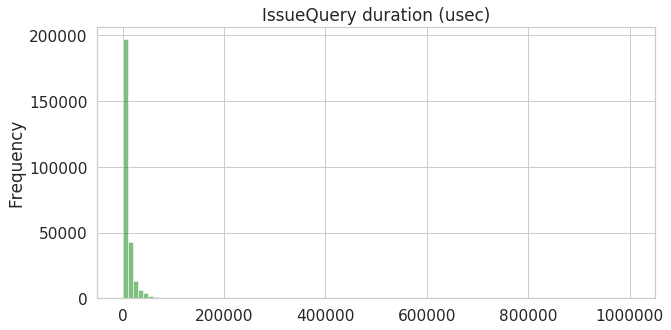

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
938271.512


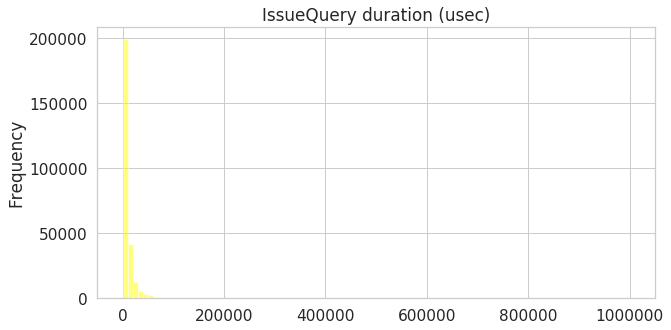

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
2491624.613


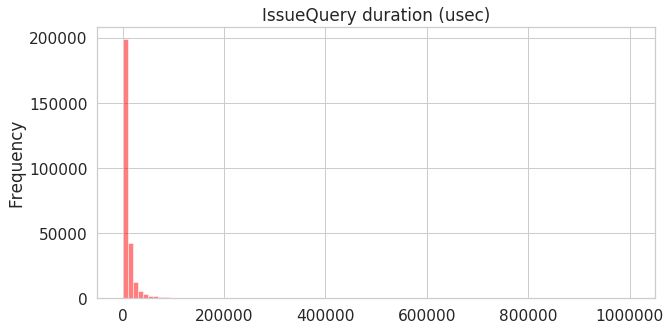

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-16-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1190074.593


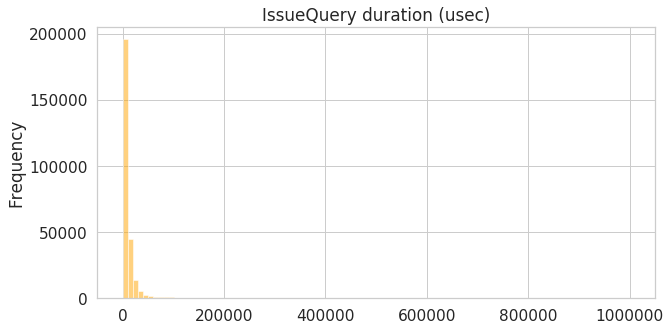

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-32-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
1734325.183


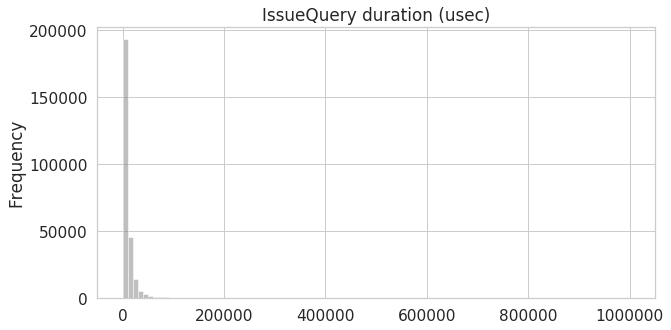

In [210]:
color=["blue","green","yellow","red","orange","grey"]
x=0
for add in ['none-resnet-1-32-S-1-10','none-resnet-2-32-S-1-10'
            ,'none-resnet-4-32-S-1-10',
           'none-resnet-8-32-S-1-10','none-resnet-16-32-S-1-10','none-resnet-32-32-S-1-10']:
    df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/"+add+"/mlperf_log_trace.json")
    df1 = df[df["name"].isin(["IssueQuery"])]
    print(max(df1['dur']))
#     df1['delta'] = df1['ts'].diff()
#     plt.hist(df1['dur'], 50, density=True, facecolor='g', alpha=0.75)
    ax = df1['dur'].plot.hist(bins=HIST_BINS, alpha=0.5, figsize=figsize, fc=color[x])
    ax.set_title('IssueQuery duration (usec)');
    x = x+1
    plt.show()

In [211]:
# df1 = df[df["name"].isin(["IssueQuery"])]
# df1['delta'] = df1['ts'].diff()
# ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# print(max(df1['dur']))
# ax.set_title('IssueQuery duration (usec)');
# # ax.set(xlim=(0, 80000))
# plt.show()
# ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
# ax.set_title('Time between IssueQuery (usec)');

# # df1['delta'].describe()

In [212]:
# for SingleStream
# if True:
#     df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('Inference time (usec)');
#     plt.show()
#     ax = df1['dur'].plot(figsize=figsize)
#     ax.set(ylim=(0, 600))
#     ax.set_title('Individual inference time (usec)');

<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-1-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
5734635.565
1793367.153
2114504.3851160854
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-2-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
5554585.616
2004139.4895000001
2106728.3502289816
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-4-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
5433337.839
1982116.084
2102271.413755481
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/none-resnet-8-32-S-1-10/mlperf_log_trace.json' mode='r' encoding='UTF-8'>
5960751.833
1986526.7505
2105844.2017069766
<_io.TextIOWrapper name='/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/

Text(0, 0.5, 'Density')

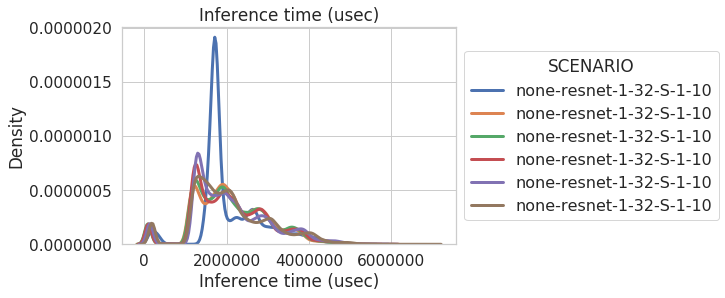

In [222]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
SCEN=['none-resnet-1-32-S-1-10','none-resnet-2-32-S-1-10'
            ,'none-resnet-4-32-S-1-10',
           'none-resnet-8-32-S-1-10','none-resnet-16-32-S-1-10','none-resnet-32-32-S-1-10']
x=0
for add in SCEN:
    df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/"+add+"/mlperf_log_trace.json")
    df1 = df[df["name"].isin(["Latency"])]
    print(max(df1['issue_to_done']))
    print(np.median(df1['issue_to_done']))
    print(np.mean(df1['issue_to_done']))
#     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('Inference time (usec)');
#     x = x+1
#     plt.show()
    
    # Draw the density plot
    sns.distplot(df1['issue_to_done'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = SCEN[x])

# Plot formatting
plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
plt.title('Inference time (usec)')
plt.xlabel('Inference time (usec)')
plt.ylabel('Density')

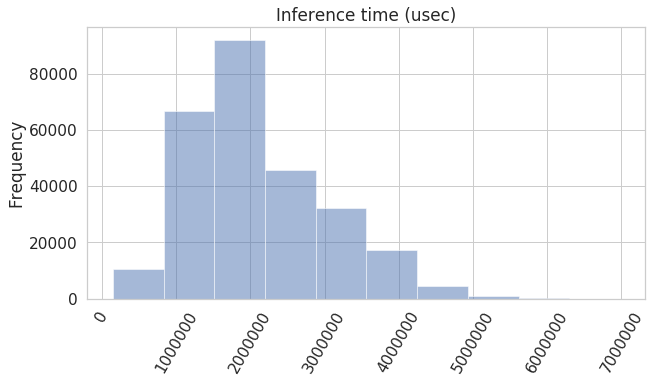

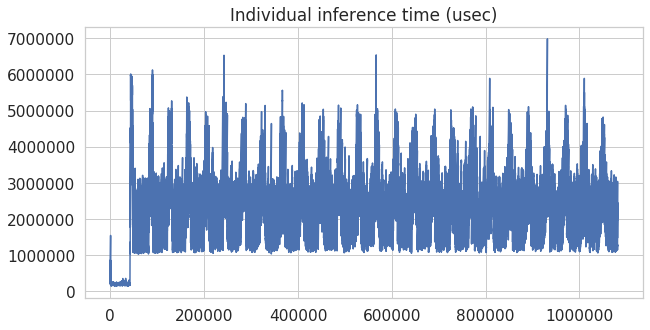

In [213]:
df1 = df[df["name"].isin(["Latency"])]
ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Inference time (usec)');
#ax.set(xlim=(0, 25000))
plt.xticks(rotation=60)
plt.show()

ax = df1['issue_to_done'].plot(figsize=figsize)
ax.set_title('Individual inference time (usec)');
#ax.set(ylim=(0, 200))
plt.show()


# df1['issue_to_done'].describe()

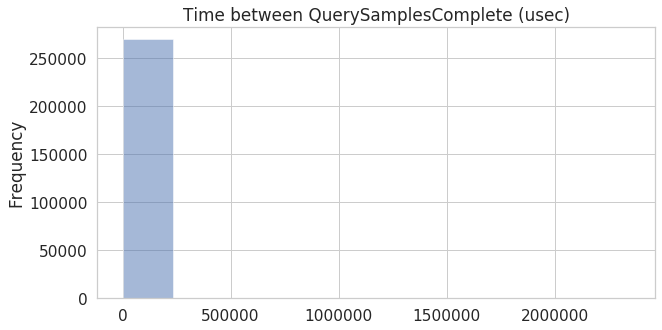

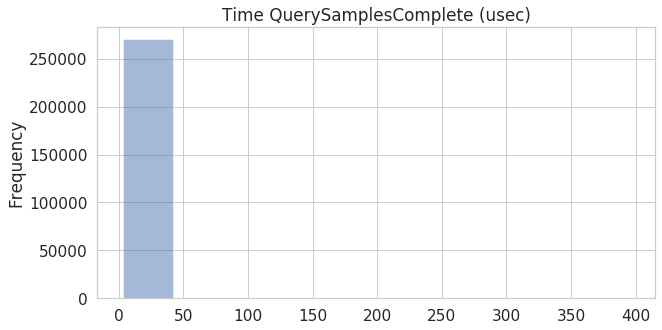

In [174]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1['delta'] = df1['ts'].diff()
ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time between QuerySamplesComplete (usec)');
plt.show()

ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time QuerySamplesComplete (usec)');

# offline scenario

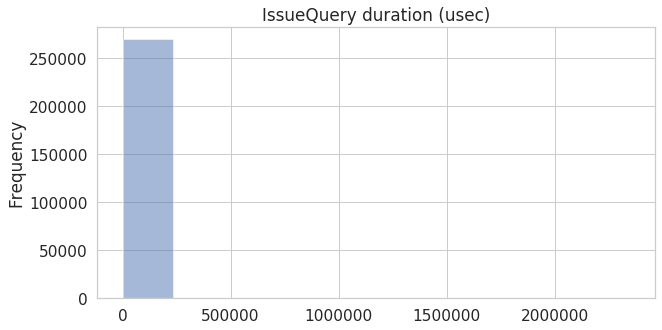

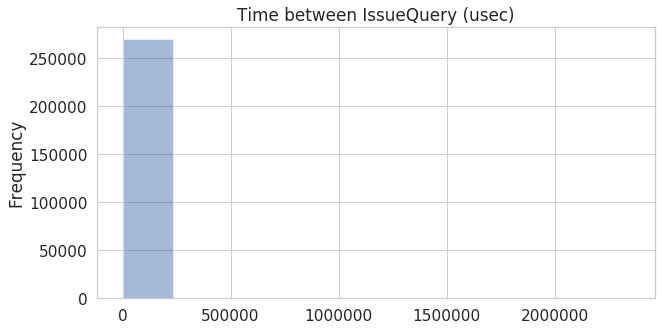

In [169]:
df1 = df[df["name"].isin(["IssueQuery"])]
df1['delta'] = df1['ts'].diff()
ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('IssueQuery duration (usec)');
plt.show()
ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time between IssueQuery (usec)');

# df1['delta'].describe()

In [223]:
# for SingleStream
# if True:
#     df1 = df[df["name"].isin(["QuerySamplesComplete"])]
#     ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('Inference time (usec)');
#     plt.show()
#     ax = df1['dur'].plot(figsize=figsize)
#     ax.set(ylim=(0, 600))
#     ax.set_title('Individual inference time (usec)');

In [ ]:
BINS=12
color=["blue","green","yellow","red","orange","grey"]
SCEN=['none-resnet-1-32-O-1-10','none-resnet-2-32-O-1-10'
            ,'none-resnet-4-32-O-1-10',
           'none-resnet-8-32-O-1-10','none-resnet-16-32-O-1-10','none-resnet-32-32-O-1-10']
x=0
for add in SCEN:
    df = trace_to_df("/gpfs/bsc_home/xpliu/inference/vision/classification_and_detection/output-exp22/"+add+"/mlperf_log_trace.json")
    df1 = df[df["name"].isin(["QuerySamplesComplete"])]
    print(max(df1['issue_to_done']))
    print(np.median(df1['issue_to_done']))
    print(np.mean(df1['issue_to_done']))
#     ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
#     ax.set_title('Inference time (usec)');
#     x = x+1
#     plt.show()
    
    # Draw the density plot
    sns.distplot(df1['issue_to_done'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = SCEN[x])

# Plot formatting
plt.legend(prop={'size': 16}, title = 'SCENARIO',loc='center left', bbox_to_anchor=(1, 0.5) )
plt.title('Inference time (usec)')
plt.xlabel('Inference time (usec)')
plt.ylabel('Density')

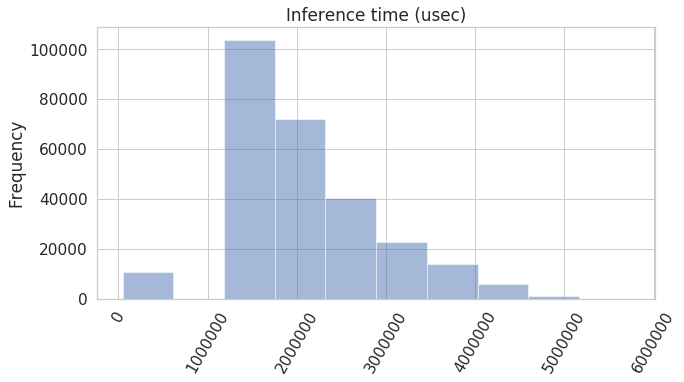

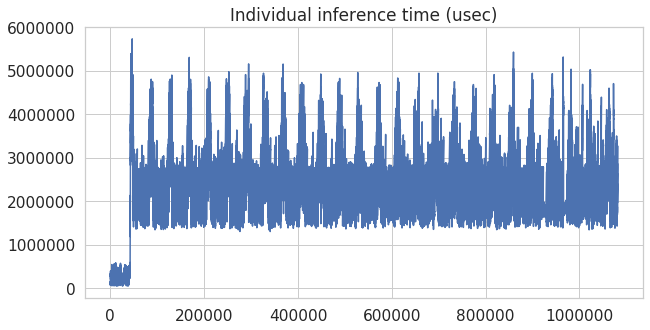

In [172]:
df1 = df[df["name"].isin(["Latency"])]
ax = df1['issue_to_done'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Inference time (usec)');
#ax.set(xlim=(0, 25000))
plt.xticks(rotation=60)
plt.show()

ax = df1['issue_to_done'].plot(figsize=figsize)
ax.set_title('Individual inference time (usec)');
#ax.set(ylim=(0, 200))
plt.show()


# df1['issue_to_done'].describe()

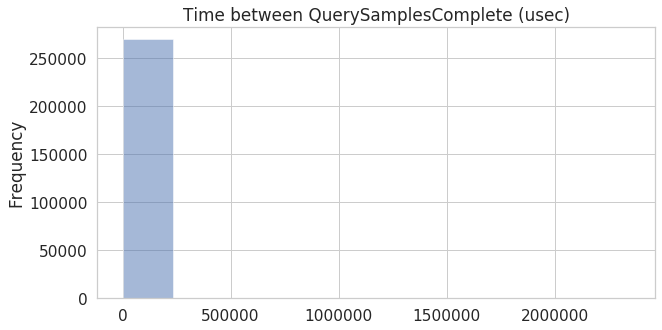

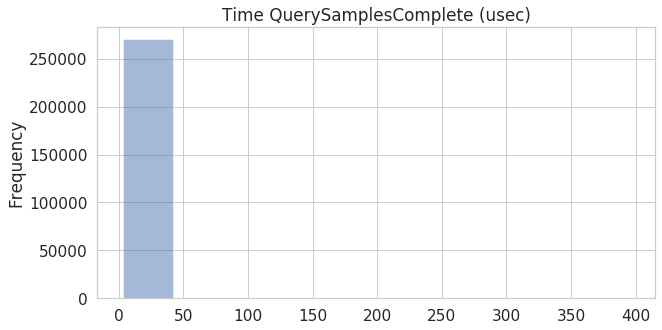

In [174]:
df1 = df[df["name"].isin(["QuerySamplesComplete"])]
df1['delta'] = df1['ts'].diff()
ax = df1['delta'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time between QuerySamplesComplete (usec)');
plt.show()

ax = df1['dur'].plot.hist(bins=BINS, alpha=0.5, figsize=figsize)
ax.set_title('Time QuerySamplesComplete (usec)');